In [1]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import earthpy as et


In [17]:
## bring in sierra nevada range

path = os.path.join("hucs-stanford", "sr396hp9621.shp")
huc = gpd.read_file(path)
# eco_bound[eco_bound['US_L3CODE']=='7']
# sn = eco_bound[eco_bound['US_L3CODE']=='5']

## import the sierra nevada as a shape file and clip
home_dir = os.getcwd()
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))
path = os.path.join("reg9_eco_l3", "reg9_eco_l3.shp")
eco_bound = gpd.read_file(path)
eco_bound[eco_bound['US_L3CODE']=='7']
sn = eco_bound[eco_bound['US_L3CODE']=='5']
os.chdir(home_dir)



In [19]:
sn_trans = sn.to_crs(huc.crs)

<AxesSubplot:>

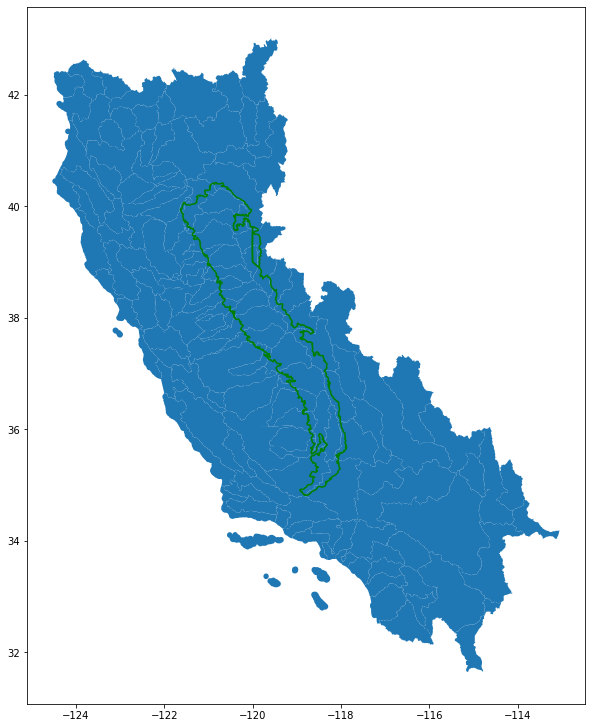

In [24]:
fig,ax = plt.subplots(figsize=(10,15))
huc.plot(ax=ax)
sn_trans.boundary.plot(ax=ax,color="green")

<AxesSubplot:>

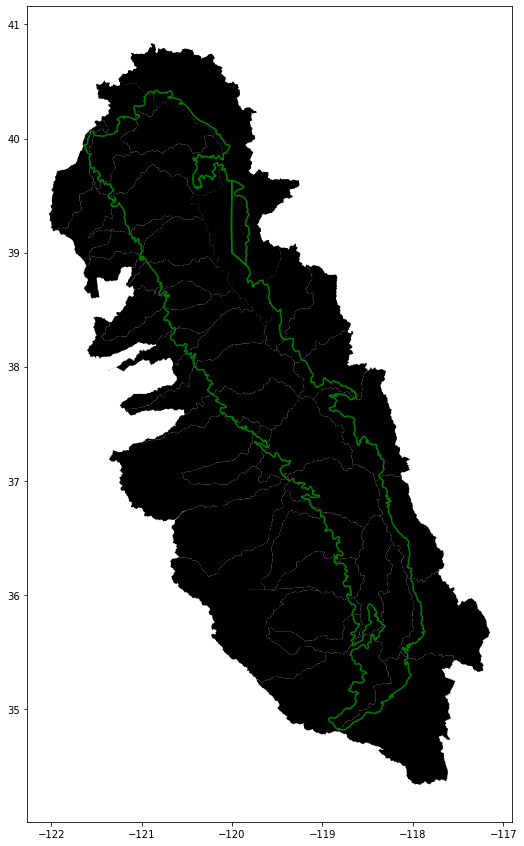

In [43]:
from rasterio.plot import plotting_extent
fig,ax = plt.subplots(figsize=(10,15))
# huc.plot(ax=ax)
sn_trans.boundary.plot(ax=ax,color="green")

sn_huc8 = gpd.sjoin(huc,sn_trans, how ='inner',op='intersects')
sn_huc8.plot(ax=ax,color='k')